In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=UserWarning)



Mean Squared Error: 1.2566766722048992
Future Rates: [-1.18146444 -1.20404872 -1.226633  ]


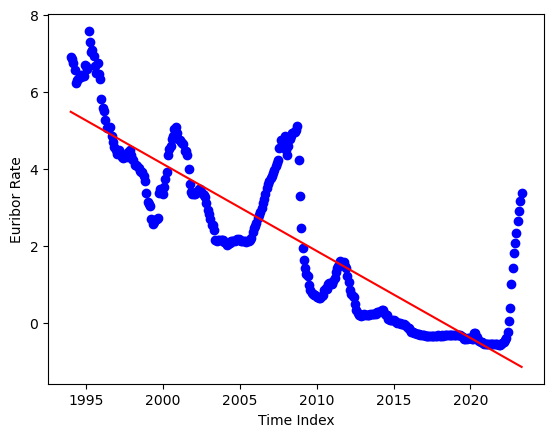

In [9]:
df = pd.read_csv("euribor_3mo_historical_close_avg_through_period_31011994_to_31052023.csv")

df['TimeIndex'] = df['Year'] + (df['Month'] - 1) / 12

X = df[['TimeIndex']]
y = df['Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

future_time_index = np.array([2023.5, 2023.6, 2023.7]).reshape(-1, 1)
future_rates = model.predict(future_time_index)
print("Future Rates:", future_rates)

plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Time Index")
plt.ylabel("Euribor Rate")
plt.show()
